In [ ]:
# *DATA ANALYSIS FOR FILM INDUSTRY ENTRY*

### Objective

1.Analyze Return on Investment (ROI) across Films

2.Compare studio performance 

3.Determine high-performing genres

In [2]:
### *1. DATA EXPLORATION*

In order to make Before conducting any detailed analysis, it is important to understand the structure, content, and quality of our datasets. This section focuses on exploring both the The 
Number, Box office mojo and The Movie datasets to gain initial insights into the available variables, identify missing or inconsistent data, and assess how the two datasets can be merged effectively.

In [62]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns


Loading of Data

In [31]:
#loading The Number data
df_tn = pd.read_csv('tn.movie_budgets.csv')
#checking the first 5 rows
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
# checking for sturucture of datasets
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
#loading of Box office mojo data
df_box = pd.read_csv("bom.movie_gross.csv")
# first five rows
df_box.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
# checking for sturucture of datasets
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [35]:
#loading ThemovieDB
df_tmdb=pd.read_csv('tmdb.movies.csv')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [36]:
# checking for sturucture of datasets
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


2.***Data Preparation and Cleaning***


(a) Cleaning the The movie database

In [39]:
import ast  

# Genre ID to name mapping
genre_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# List of column relevant 
keep_cols = [
    'id',              
    'original_title',  
    'release_date',
    'genre_ids',
    'popularity',
    'vote_average',
    'vote_count'
]

# Add release_year column 
if 'release_year' not in df_tmdb.columns:
    df_tmdb['release_year'] = pd.to_datetime(df_tmdb['release_date'], errors='coerce').dt.year

# Add it to the list if needed
if 'release_year' not in keep_cols:
    keep_cols.append('release_year')

# Subset and copy data
df_tmdb_clean = df_tmdb[keep_cols].copy()

# Filter: remove entries with zero or missing ID/popularity or release year
df_tmdb_clean = df_tmdb_clean[
    (df_tmdb_clean['id'] > 0) &
    (df_tmdb_clean['popularity'] > 0)
].dropna(subset=['release_year'])

# Convert genre_ids from string to list of integers
df_tmdb_clean['genre_ids'] = df_tmdb_clean['genre_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
)

# Map genre IDs to names
df_tmdb_clean['genres'] = df_tmdb_clean['genre_ids'].apply(
    lambda ids: [genre_map.get(i, 'Unknown') for i in ids]
)

# Optional: create a single string version
df_tmdb_clean['genres'] = df_tmdb_clean['genres'].apply(lambda x: ', '.join(x))

# Reset index
df_tmdb_clean = df_tmdb_clean.reset_index(drop=True)

# Preview
print(df_tmdb_clean[['original_title', 'release_year', 'genres']].head())
print("Shape:", df_tmdb_clean.shape)
df_tmdb_clean.info()


                                 original_title  release_year  \
0  Harry Potter and the Deathly Hallows: Part 1          2010   
1                      How to Train Your Dragon          2010   
2                                    Iron Man 2          2010   
3                                     Toy Story          1995   
4                                     Inception          2010   

                                  genres  
0             Adventure, Fantasy, Family  
1  Fantasy, Adventure, Animation, Family  
2     Adventure, Action, Science Fiction  
3              Animation, Comedy, Family  
4     Action, Science Fiction, Adventure  
Shape: (26517, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26517 non-null  int64  
 1   original_title  26517 non-null  object 
 2   release_date    26517 non-null  object 


In [ ]:
(b). Cleaning The Numbers datasets

In [40]:


# Select key columns
keep_cols = [
    'release_date',
    'movie',
    'production_budget',
    'domestic_gross',
    'worldwide_gross'
]

df_tn = df_tn[keep_cols].copy()

# Clean monetary columns: remove currency symbols and convert to numeric
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df_tn[col] = (
        df_tn[col].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace('nan', '0') 
        .astype(float)
    )

# Optionally: parse release_date into datetime and derive yearmtn
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'], errors='coerce')
df_tn['release_year'] = df_tn['release_date'].dt.year

# Drop rows with invalid or missing numeric data if needed
df_tn_clean = df_tn.dropna(subset=['production_budget', 'worldwide_gross', 'release_date'])

print(df_tn_clean.head())
print("Clean shape:", df_tn_clean.shape)
df_tn_clean.info()


  release_date                                        movie  \
0   2009-12-18                                       Avatar   
1   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   2019-06-07                                 Dark Phoenix   
3   2015-05-01                      Avengers: Age of Ultron   
4   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  release_year  
0        425000000.0     760507625.0     2.776345e+09          2009  
1        410600000.0     241063875.0     1.045664e+09          2011  
2        350000000.0      42762350.0     1.497624e+08          2019  
3        330600000.0     459005868.0     1.403014e+09          2015  
4        317000000.0     620181382.0     1.316722e+09          2017  
Clean shape: (5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------      

(c). Cleaning  The Box office mojo data 

In [26]:
#  columns to keep
keep_cols = [
    'title',
    'studio',
    'domestic_gross',
    'foreign_gross',
    'year'
    ]

# Select and copy
df_box = df_box[keep_cols].copy()

# Clean monetary columns: strip '$' and commas, convert to float
for col in ['domestic_gross', 'foreign_gross']:
    df_box[col] = (
        df_box[col]
        .astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace('nan', '0')  # replace string 'nan' with 0
        .astype(float) 
        
    )
# Filter out rows with zero worldwide gross create worlwide_gross by adding domestic and foreign  gross
df_box['worldwide_gross']=df_box['domestic_gross']+df_box['foreign_gross']
df_box_clean = df_box[(df_box['worldwide_gross'] > 0) &
    (df_box['year'].notna())
].copy()

# Reset index
df_box_clean = df_box_clean.reset_index(drop=True)

print(df_box_clean.head())
print("Shape:", df_box_clean.shape)


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  worldwide_gross  
0    652000000.0  2010     1.067000e+09  
1    691300000.0  2010     1.025500e+09  
2    664300000.0  2010     9.603000e+08  
3    535700000.0  2010     8.283000e+08  
4    513900000.0  2010     7.526000e+08  
Shape: (3387, 6)


## *Merging datasets*

In [47]:
print(df_tmdb_clean.columns)
print(df_tn_clean.columns)


Index(['id', 'original_title', 'release_date', 'genre_ids', 'popularity',
       'vote_average', 'vote_count', 'release_year', 'genres'],
      dtype='object')
Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year'],
      dtype='object')


In [13]:
# merging the   column name for df_box_clean
df_box_clean = df_box_clean.rename(columns={'year': 'release_year'})

In [49]:
df_tn_clean = df_tn_clean.rename(columns={'movie': 'original_title'})

df_tmdb_tn = pd.merge(
    df_tmdb_clean,
    df_tn_clean,
    how='inner',
    on=['original_title', 'release_year'],
    suffixes=('_tmdb', '_tn')
)


In [50]:
# Merge TMDB and The Number
df_tmdb_tn = pd.merge(
    df_tmdb_clean,
    df_tn_clean,
    how='inner',
    on=['original_title','release_year']
)
df_tmdb_tn.columns

Index(['id', 'original_title', 'release_date_x', 'genre_ids', 'popularity',
       'vote_average', 'vote_count', 'release_year', 'genres',
       'release_date_y', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [45]:
df_tn_clean = df_tn_clean.rename(columns={'old_name': 'title_merge'})


In [51]:
# inspect
print(df_tmdb_clean.columns)
print(df_tn_clean.columns)

# clean column headers
df_tmdb_clean.columns = df_tmdb_clean.columns.str.strip()
df_tn_clean.columns   = df_tn_clean.columns.str.strip()

# merge
df_tmdb_tn = pd.merge(
    df_tmdb_clean,
    df_tn_clean,
    on='original_title',
    how='inner'
)
print(df_tmdb_tn.head())


Index(['id', 'original_title', 'release_date', 'genre_ids', 'popularity',
       'vote_average', 'vote_count', 'release_year', 'genres'],
      dtype='object')
Index(['release_date', 'original_title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year'],
      dtype='object')
      id            original_title release_date_x            genre_ids  \
0  10191  How to Train Your Dragon     2010-03-26  [14, 12, 16, 10751]   
1  10138                Iron Man 2     2010-05-07        [12, 28, 878]   
2    862                 Toy Story     1995-11-22      [16, 35, 10751]   
3    862                 Toy Story     1995-11-22      [16, 35, 10751]   
4  27205                 Inception     2010-07-16        [28, 878, 12]   

   popularity  vote_average  vote_count  release_year_x  \
0      28.734           7.7        7610            2010   
1      28.515           6.8       12368            2010   
2      28.005           7.9       10174            1995   
3      28.005 

In [60]:
print(df_tmdb_clean.columns)
print(df_box_clean.columns)


Index(['id', 'original_title', 'release_date', 'genre_ids', 'popularity',
       'vote_average', 'vote_count', 'release_year', 'genres'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'worldwide_gross'],
      dtype='object')


In [68]:
df_tmdb_clean['release_year'] = df_tmdb_clean['release_year'].astype('Int64')
df_box_clean['release_year'] = df_box_clean['release_year'].astype('Int64')


In [69]:
df_box_clean = df_box_clean.rename(columns={'title': 'original_title'})


In [70]:
# Merge the result with Box Office Mojo
df_box_clean = df_box_clean.rename(columns={'title': 'original_title', 'year': 'release_year'})

df_merged = pd.merge(
    df_tmdb_clean,
    df_box_clean,
    how='inner',
    on=['original_title', 'release_year'],
    suffixes=('_tmdb', '_box')
)


## *DATA ANALYSIS*

#### 1.Analysing the return of investment by the production budget.
 The aim of this objective is to determine which production budget category yields more relative profitability.Here the  ROI is defined and then plotted against the 


Merged columns: ['id', 'original_title', 'release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count', 'release_year', 'genres', 'studio', 'domestic_gross', 'foreign_gross', 'worldwide_gross']
  budget_category  n_movies       avg_roi    median_roi
0          < $10M      1985  55034.810571  12443.224095
1       $10M–$50M         0          <NA>          <NA>
2      $50M–$100M         0          <NA>          <NA>
3     $100M–$200M         0          <NA>          <NA>
4     $200M–$500M         0          <NA>          <NA>
5          $500M+         0          <NA>          <NA>


C:\Users\HP\AppData\Local\Temp\ipykernel_3972\2254409603.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('budget_category')['roi']
C:\Users\HP\GRAPHISOFT\Publisher log files\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


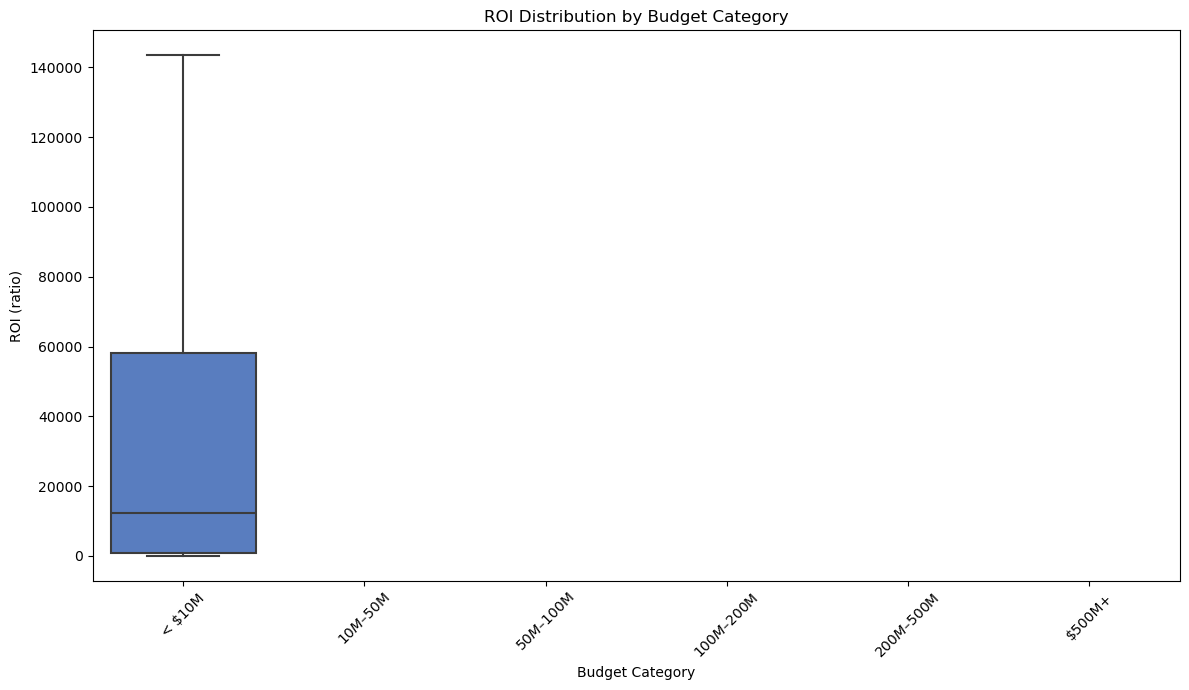

In [112]:
import pandas as pd

# Rename and clean
df_box_clean = df_box_clean.rename(columns={'title': 'original_title', 'year': 'release_year'})
df_tmdb_clean['original_title'] = df_tmdb_clean['original_title'].str.strip()
df_box_clean['original_title'] = df_box_clean['original_title'].str.strip()

df_tmdb_clean['release_year'] = pd.to_numeric(df_tmdb_clean['release_year'], errors='coerce').astype('Int64')
df_box_clean['release_year'] = pd.to_numeric(df_box_clean['release_year'], errors='coerce').astype('Int64')

df_box_clean['worldwide_gross'] = pd.to_numeric(
    df_box_clean['worldwide_gross'].replace(r'[\$,]', '', regex=True),
    errors='coerce'
)

if 'production_budget' in df_box_clean:
    df_box_clean['production_budget'] = pd.to_numeric(
        df_box_clean['production_budget'].replace(r'[\$,]', '', regex=True),
        errors='coerce'
    )

# Compute ROI rati0
df['roi'] = (df[gross_col] - df[budget_col]) / df[budget_col]

# === Step 6: Define budget categories ===
budget_bins = [0, 10_000_000, 50_000_000, 100_000_000, 200_000_000, 500_000_000, float('inf')]
budget_labels = ['< $10M', '$10M–$50M', '$50M–$100M', '$100M–$200M', '$200M–$500M', '$500M+']

df['budget_category'] = pd.cut(
    df[budget_col],
    bins=budget_bins,
    labels=budget_labels,
    include_lowest=True
)

#Summarize average ROI & counts 
budget_summary = (
    df
    .groupby('budget_category')['roi']
    .agg(n_movies='count', avg_roi='mean', median_roi='median')
    .reset_index()
)
print(budget_summary)

plt.figure(figsize=(12, 7))
sns.boxplot(x='budget_category', y='roi', data=df, showfliers=False, palette='muted')
plt.xticks(rotation=45)
plt.ylabel('ROI (ratio)')
plt.xlabel('Budget Category')
plt.title('ROI Distribution by Budget Category')
plt.tight_layout()
plt.show()


The  above vizualization of ** ROI against  Budget category**  shows that:
 -The ** "< $10M"** budget category had the ** highest relative profitability 

### 2. Analysing the top performing studios in terms of ROI and revenue 

In [ ]:
studio_performance = df_merged.groupby('studio').agg({
    'roi': 'mean',
    'worldwide_gross_y': 'mean',
    'original_title': 'count'
}).rename(columns={'original_title': 'film_count'}).sort_values(by='roi', ascending=False)

print(studio_performance.head(10))

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'studio' column is clean (no NaN, uniform formatting)
df['studio'] = df['studio'].fillna('Unknown').str.strip()

# Group by studio to compute average ROI
studio_performance = (
    df.groupby('studio')['roi']
      .agg(avg_roi='mean', count='count')
      .reset_index()
      .sort_values(by='avg_roi', ascending=False)
)

# Select top studios with sufficient data points
top_studios = studio_performance[studio_performance['count'] >= 5].head(10)


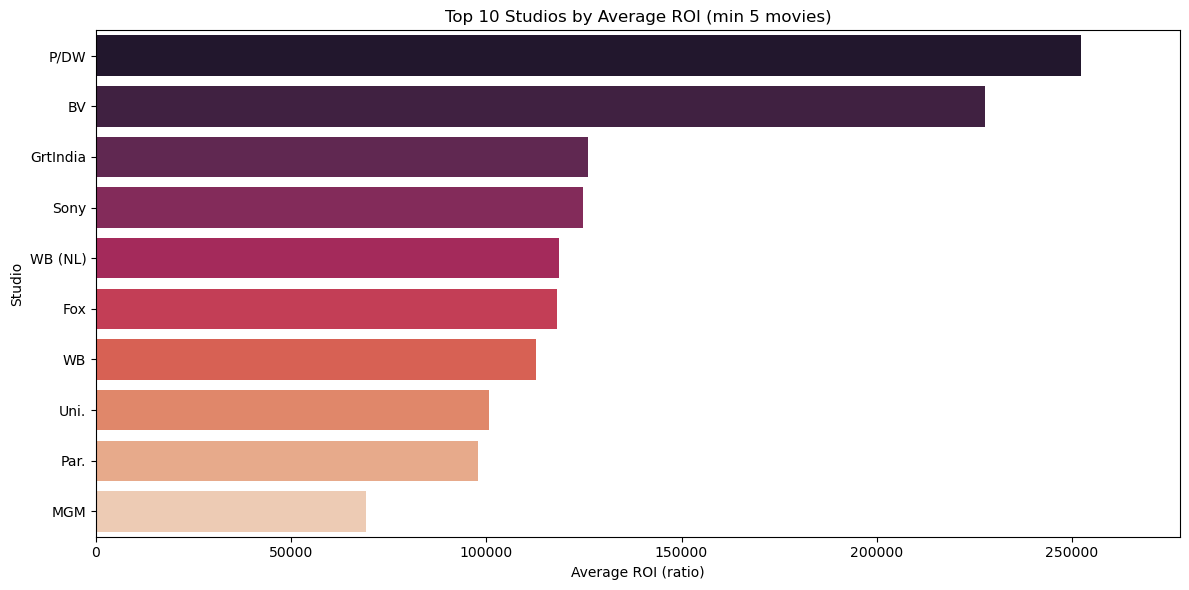

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_studios,
    x='avg_roi',
    y='studio',
    palette='rocket'
)
plt.xlabel('Average ROI (ratio)')
plt.ylabel('Studio')
plt.title('Top 10 Studios by Average ROI (min 5 movies)')
plt.xlim(0, top_studios['avg_roi'].max() * 1.1)
plt.tight_layout()
plt.show()


This bar graph shows the that the P/DW  studio has the highest avarage revenue

 ### 3. Analysing the Best Performing Genres by ROI and Revenue

In [121]:
df_genres = (
    df.copy()
      .assign(genres = df['genres'].fillna('Unknown').str.split(', '))
      .explode('genres')
)


In [130]:
# Ensure 'roi' and 'worldwide_gross' are numeric
df_genres['studio'] = pd.to_numeric(df_genres['studio'], errors='coerce')
df_genres['worldwide_gross'] = pd.to_numeric(df_genres['worldwide_gross'], errors='coerce')


In [136]:
genre_performance = (
    df_genres
      .groupby('genres')
      .agg(
          avg_roi=('domestic_gross', 'mean'),
          avg_revenue=('worldwide_gross', 'mean'),
          film_count=('id', 'count')
      )
      .sort_values(by='avg_roi', ascending=False)
)
top10 = genre_performance.head(10).reset_index()
print(top10)


            genres       avg_roi   avg_revenue  film_count
0        Adventure  1.369376e+08  3.689921e+08         300
1        Animation  1.248312e+08  3.510493e+08         117
2          Fantasy  1.220694e+08  3.145268e+08         163
3  Science Fiction  1.214288e+08  3.025960e+08         187
4           Family  1.036743e+08  2.818707e+08         175
5           Action  9.984052e+07  2.581610e+08         410
6              War  5.158894e+07  1.032443e+08          52
7          Western  5.144416e+07  1.187562e+08          26
8           Comedy  4.975589e+07  1.163299e+08         651
9            Crime  3.805539e+07  8.391606e+07         235


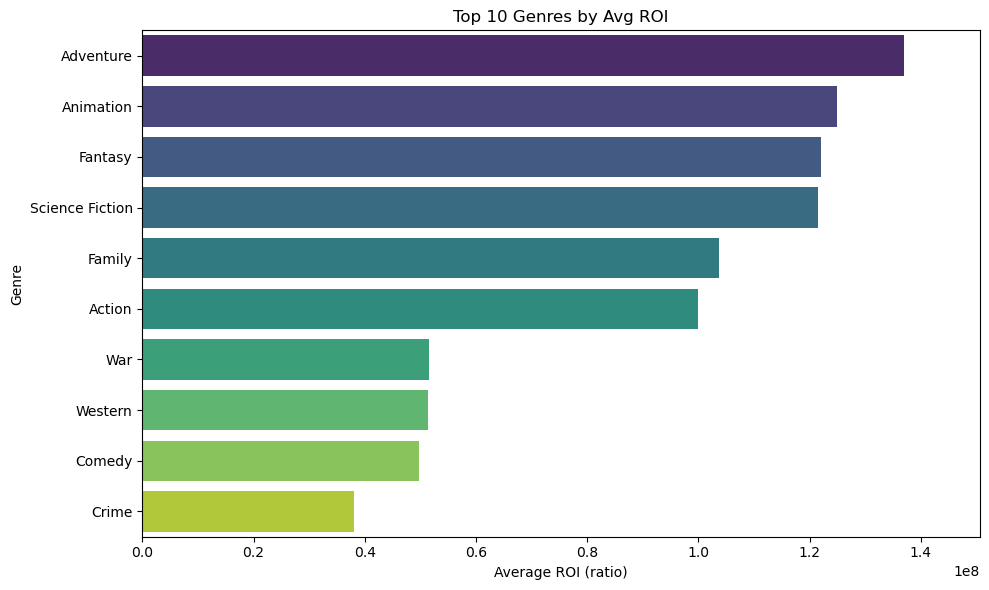

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='avg_roi', y='genres', palette='viridis')
plt.xlabel('Average ROI (ratio)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Avg ROI')
plt.xlim(0, top10['avg_roi'].max() * 1.1)
plt.tight_layout()
plt.show()


In [124]:
print(df_genres.columns.tolist())


['id', 'original_title', 'release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count', 'release_year', 'genres', 'studio', 'domestic_gross', 'foreign_gross', 'worldwide_gross']


This graph suggests that horror films are often low-budget but highly profitable.